# Linear Regression

### todolist
**线性回归 解析解**

后续回来进行推导 虽然有解析解，但是我们为了真正通过神经网络训练得到一组数组，所以暂时不用

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

Given data pairs $[\mathbf{x}, y]$, our objective is to accurately estimate the parameters $\mathbf{w}$ and $b$.

$$y = \sum_{i=0}^m w_i x_i + b$$

By employing Linear Regression, we can efficiently determine these parameters.

To proceed, we first need to generate a dataset.

### Generating Data

In [2]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt

#### what is normal
torch.normal(mean, std, size)


mean：分布的均值。可以是一个标量（单个值）或一个形状与 size 相匹配的张量。


std：分布的标准差。同样可以是一个标量或一个形状与 size 相匹配的张量。


size：指定输出张量的形状，是一个维度元组

In [3]:
def generate_data(w, b, num_examples) : 
    X = torch.normal(3, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.001, y.shape)
    return X, y.reshape((-1, 1))# -1 is automatic calc for shape size

true_W = torch.tensor([6.0, -8.3])
true_B = torch.tensor(-5.2)
X, y = generate_data(true_W, true_B, 2)
features, labels = generate_data(true_W, true_B, 1000)
print("X", X, "\ny", y, "\ntrue_W", true_W, "\ntrue_B", true_B, labels.shape)

X tensor([[1.2422, 0.9267],
        [2.2927, 3.3978]]) 
y tensor([[ -5.4389],
        [-19.6435]]) 
true_W tensor([ 6.0000, -8.3000]) 
true_B tensor(-5.2000) torch.Size([1000, 1])


Now we have successfully generated the data.

Using matplotlib to visually display the data.

(tensor([3.1176, 3.3628]), tensor([-14.4069]))

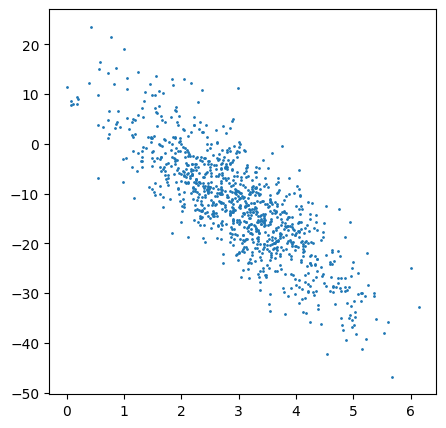

In [4]:
plt.figure(figsize=(5, 5))
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(),1)
features[0], labels[0]

### Reading Data Set

We choose the data iteratively, each time we get batch_size data as input.

To ensure the quality of data, we use random.shuffle to shuffle the array.

In [5]:
def Choose(features, labels, batch_size):
    num_examples = len(labels)
    index = list(range(num_examples))
    random.shuffle(index)
    for i in range(0, num_examples, batch_size):
        cur_index = index[i: min(i + batch_size, num_examples)]
        yield features[cur_index], labels[cur_index]
for x, y in Choose(features, labels, 10):
    print(x, '\n', y)
    break

tensor([[2.3694, 0.1088],
        [1.7407, 3.3660],
        [1.5028, 3.0593],
        [4.3838, 4.2380],
        [3.3856, 5.2475],
        [2.5310, 3.6083],
        [2.5610, 3.2928],
        [4.4050, 3.8311],
        [2.0941, 1.2891],
        [1.7463, 5.0171]]) 
 tensor([[  8.1130],
        [-22.6940],
        [-21.5743],
        [-14.0715],
        [-28.4380],
        [-19.9636],
        [-17.1611],
        [-10.5676],
        [ -3.3351],
        [-36.3646]])


### Initialize the model

In [6]:
def linear(X, w, b):
    return torch.matmul(X, w) + b

In [7]:
def square_loss(y, y_hat):
    return (y - y_hat.reshape(y.shape)) ** 2 / 2

### Defining the model


In [8]:
def sgd(params, learning_rate, batch_size):
    #with torch.no_grad(): 
        for param in params:
            param -= learning_rate * param.grad / batch_size
            param.grad.zero_()

In [9]:
learning_rate = 0.03
loss = square_loss
net = linear
batch_size = 10
num_iterations = 100

In [13]:
w = torch.normal(0, 1, true_W.shape, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b
for iterator in range(num_iterations):
    for X, y in Choose(features, labels, batch_size):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        with torch.no_grad():
            sgd([w, b], learning_rate, batch_size)
    with torch.no_grad():
        # print(w, ' ', true_W, '\n' , b, ' ' , true_B, '\n')
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {iterator + 1}, loss {float(train_l.mean()):f}', w, '\n', b)

epoch 1, loss 0.445913 tensor([ 5.1214, -8.6068], requires_grad=True) 
 tensor([-1.6118], requires_grad=True)
epoch 2, loss 0.256761 tensor([ 5.4982, -8.7798], requires_grad=True) 
 tensor([-2.1272], requires_grad=True)
epoch 3, loss 0.202093 tensor([ 5.6076, -8.6933], requires_grad=True) 
 tensor([-2.5591], requires_grad=True)
epoch 4, loss 0.164198 tensor([ 5.6824, -8.6275], requires_grad=True) 
 tensor([-2.9360], requires_grad=True)
epoch 5, loss 0.104284 tensor([ 5.7133, -8.6010], requires_grad=True) 
 tensor([-3.2683], requires_grad=True)
epoch 6, loss 0.076637 tensor([ 5.7394, -8.5435], requires_grad=True) 
 tensor([-3.5441], requires_grad=True)
epoch 7, loss 0.054567 tensor([ 5.7785, -8.5242], requires_grad=True) 
 tensor([-3.7833], requires_grad=True)
epoch 8, loss 0.048318 tensor([ 5.8342, -8.4802], requires_grad=True) 
 tensor([-3.9801], requires_grad=True)
epoch 9, loss 0.029696 tensor([ 5.8266, -8.4655], requires_grad=True) 
 tensor([-4.1629], requires_grad=True)
epoch 10, 